In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
#Load the movie ratings dataset
df = pd.read_csv('movie_ratings.csv')

In [80]:
#Preprocess the data
df['Rating'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

In [81]:
#Define the environment
arms = df['MovieID'].unique()
n_arms = len(arms)

In [88]:
#Compute rewards
rewards = df.groupby('MovieID')['Rating'].mean().values

In [93]:
#Random Policy
np.random.seed(0)
random_rewards = np.zeros(1000)
for i in range(1000):
    arm = np.random.choice(arms)
    reward = np.random.binomial(1, rewards[np.where(arms == arm)[0][0]])
    random_rewards[i] = reward
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")

Iteration 1: Arm 96811, Reward 1
Iteration 2: Arm 7028, Reward 1
Iteration 3: Arm 90243, Reward 0
Iteration 4: Arm 6186, Reward 0
Iteration 5: Arm 7124, Reward 0
Iteration 6: Arm 852, Reward 0
Iteration 7: Arm 5267, Reward 0
Iteration 8: Arm 180, Reward 0
Iteration 9: Arm 4263, Reward 0
Iteration 10: Arm 3134, Reward 1
Iteration 11: Arm 6711, Reward 1
Iteration 12: Arm 4220, Reward 0
Iteration 13: Arm 5218, Reward 0
Iteration 14: Arm 535, Reward 0
Iteration 15: Arm 3581, Reward 0
Iteration 16: Arm 146656, Reward 1
Iteration 17: Arm 65882, Reward 1
Iteration 18: Arm 7075, Reward 0
Iteration 19: Arm 6300, Reward 0
Iteration 20: Arm 65685, Reward 0
Iteration 21: Arm 6235, Reward 0
Iteration 22: Arm 2709, Reward 0
Iteration 23: Arm 8121, Reward 1
Iteration 24: Arm 1335, Reward 0
Iteration 25: Arm 737, Reward 0
Iteration 26: Arm 7263, Reward 1
Iteration 27: Arm 7304, Reward 0
Iteration 28: Arm 43560, Reward 0
Iteration 29: Arm 3514, Reward 0
Iteration 30: Arm 649, Reward 0
Iteration 31: Arm

In [96]:
#Greedy Policy
greedy_rewards = np.zeros(1000)
estimated_rewards = np.zeros(n_arms)
counts = np.zeros(n_arms)
for i in range(1000):
    # Initialize the arm with a valid value from the 'arms' array for the first iteration
    arm = arms[np.argmax(estimated_rewards)] if i > 0 else arms[0]
    reward = np.random.binomial(1, rewards[np.where(arms == arm)[0][0]])
    estimated_rewards[np.where(arms == arm)[0][0]] = (estimated_rewards[np.where(arms == arm)[0][0]] * counts[np.where(arms == arm)[0][0]] + reward) / (counts[np.where(arms == arm)[0][0]] + 1)
    counts[np.where(arms == arm)[0][0]] += 1
    greedy_rewards[i] = reward
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")

Iteration 1: Arm 1, Reward 1
Iteration 2: Arm 1, Reward 1
Iteration 3: Arm 1, Reward 1
Iteration 4: Arm 1, Reward 0
Iteration 5: Arm 1, Reward 1
Iteration 6: Arm 1, Reward 1
Iteration 7: Arm 1, Reward 1
Iteration 8: Arm 1, Reward 1
Iteration 9: Arm 1, Reward 0
Iteration 10: Arm 1, Reward 1
Iteration 11: Arm 1, Reward 1
Iteration 12: Arm 1, Reward 1
Iteration 13: Arm 1, Reward 1
Iteration 14: Arm 1, Reward 1
Iteration 15: Arm 1, Reward 1
Iteration 16: Arm 1, Reward 1
Iteration 17: Arm 1, Reward 0
Iteration 18: Arm 1, Reward 1
Iteration 19: Arm 1, Reward 1
Iteration 20: Arm 1, Reward 1
Iteration 21: Arm 1, Reward 1
Iteration 22: Arm 1, Reward 1
Iteration 23: Arm 1, Reward 1
Iteration 24: Arm 1, Reward 1
Iteration 25: Arm 1, Reward 0
Iteration 26: Arm 1, Reward 0
Iteration 27: Arm 1, Reward 1
Iteration 28: Arm 1, Reward 1
Iteration 29: Arm 1, Reward 1
Iteration 30: Arm 1, Reward 0
Iteration 31: Arm 1, Reward 0
Iteration 32: Arm 1, Reward 0
Iteration 33: Arm 1, Reward 1
Iteration 34: Arm 1

In [99]:
#Epsilon-Greedy Policy for E=0.1
epsilon = 0.1
epsilon_greedy_rewards = np.zeros(1000)
estimated_rewards = np.zeros(n_arms)
counts = np.zeros(n_arms)
for i in range(1000):
    if np.random.rand() < epsilon:
        arm = np.random.choice(arms)
        print(arm)
    else:
        # Ensure arm is a valid movie ID even when estimated_rewards are all 0
        arm = arms[np.argmax(estimated_rewards)] if i > 0 else np.random.choice(arms)
    reward = np.random.binomial(1, rewards[np.where(arms == arm)[0][0]])
    estimated_rewards[np.where(arms == arm)[0][0]] = (estimated_rewards[np.where(arms == arm)[0][0]] * counts[np.where(arms == arm)[0][0]] + reward) / (counts[np.where(arms == arm)[0][0]] + 1)
    counts[np.where(arms == arm)[0][0]] += 1
    epsilon_greedy_rewards[i] = reward
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")

Iteration 1: Arm 2618, Reward 1
109487
Iteration 2: Arm 109487, Reward 0
Iteration 3: Arm 2618, Reward 1
2065
Iteration 4: Arm 2065, Reward 0
Iteration 5: Arm 2618, Reward 0
Iteration 6: Arm 2618, Reward 1
Iteration 7: Arm 2618, Reward 1
714
Iteration 8: Arm 714, Reward 0
Iteration 9: Arm 2618, Reward 1
Iteration 10: Arm 2618, Reward 1
Iteration 11: Arm 2618, Reward 1
Iteration 12: Arm 2618, Reward 1
Iteration 13: Arm 2618, Reward 1
Iteration 14: Arm 2618, Reward 1
Iteration 15: Arm 2618, Reward 0
Iteration 16: Arm 2618, Reward 0
Iteration 17: Arm 2618, Reward 1
Iteration 18: Arm 2618, Reward 1
Iteration 19: Arm 2618, Reward 1
Iteration 20: Arm 2618, Reward 1
106
Iteration 21: Arm 106, Reward 1
Iteration 22: Arm 106, Reward 1
Iteration 23: Arm 106, Reward 1
976
Iteration 24: Arm 976, Reward 0
Iteration 25: Arm 106, Reward 0
Iteration 26: Arm 2618, Reward 1
Iteration 27: Arm 2618, Reward 1
Iteration 28: Arm 2618, Reward 0
Iteration 29: Arm 2618, Reward 1
Iteration 30: Arm 2618, Reward 1

In [98]:
#Epsilon-Greedy Policy for E=0.2
epsilon = 0.2
epsilon_greedy_rewards = np.zeros(1000)
estimated_rewards = np.zeros(n_arms)
counts = np.zeros(n_arms)
for i in range(1000):
    if np.random.rand() < epsilon:
        arm = np.random.choice(arms)
        print(arm)
    else:
        # Ensure arm is a valid movie ID even when estimated_rewards are all 0
        arm = arms[np.argmax(estimated_rewards)] if i > 0 else np.random.choice(arms)
    reward = np.random.binomial(1, rewards[np.where(arms == arm)[0][0]])
    estimated_rewards[np.where(arms == arm)[0][0]] = (estimated_rewards[np.where(arms == arm)[0][0]] * counts[np.where(arms == arm)[0][0]] + reward) / (counts[np.where(arms == arm)[0][0]] + 1)
    counts[np.where(arms == arm)[0][0]] += 1
    epsilon_greedy_rewards[i] = reward
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")

Iteration 1: Arm 114925, Reward 1
Iteration 2: Arm 114925, Reward 1
Iteration 3: Arm 114925, Reward 1
Iteration 4: Arm 114925, Reward 1
Iteration 5: Arm 114925, Reward 1
Iteration 6: Arm 114925, Reward 1
Iteration 7: Arm 114925, Reward 1
7072
Iteration 8: Arm 7072, Reward 0
Iteration 9: Arm 114925, Reward 1
Iteration 10: Arm 114925, Reward 1
Iteration 11: Arm 114925, Reward 1
1188
Iteration 12: Arm 1188, Reward 0
Iteration 13: Arm 114925, Reward 1
Iteration 14: Arm 114925, Reward 1
477
Iteration 15: Arm 477, Reward 0
Iteration 16: Arm 114925, Reward 1
112868
Iteration 17: Arm 112868, Reward 1
134246
Iteration 18: Arm 134246, Reward 0
Iteration 19: Arm 112868, Reward 1
605
Iteration 20: Arm 605, Reward 0
Iteration 21: Arm 112868, Reward 1
Iteration 22: Arm 112868, Reward 1
5046
Iteration 23: Arm 5046, Reward 0
3130
Iteration 24: Arm 3130, Reward 0
Iteration 25: Arm 112868, Reward 1
Iteration 26: Arm 112868, Reward 1
179135
Iteration 27: Arm 179135, Reward 1
Iteration 28: Arm 112868, Rew

In [100]:
#Epsilon-Greedy Policy for E=0.5
epsilon = 0.5
epsilon_greedy_rewards = np.zeros(1000)
estimated_rewards = np.zeros(n_arms)
counts = np.zeros(n_arms)
for i in range(1000):
    if np.random.rand() < epsilon:
        arm = np.random.choice(arms)
        print(arm)
    else:
        # Ensure arm is a valid movie ID even when estimated_rewards are all 0
        arm = arms[np.argmax(estimated_rewards)] if i > 0 else np.random.choice(arms)
    reward = np.random.binomial(1, rewards[np.where(arms == arm)[0][0]])
    estimated_rewards[np.where(arms == arm)[0][0]] = (estimated_rewards[np.where(arms == arm)[0][0]] * counts[np.where(arms == arm)[0][0]] + reward) / (counts[np.where(arms == arm)[0][0]] + 1)
    counts[np.where(arms == arm)[0][0]] += 1
    epsilon_greedy_rewards[i] = reward
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")

Iteration 1: Arm 4568, Reward 1
Iteration 2: Arm 4568, Reward 0
Iteration 3: Arm 4568, Reward 0
7419
Iteration 4: Arm 7419, Reward 0
Iteration 5: Arm 4568, Reward 1
128520
Iteration 6: Arm 128520, Reward 0
Iteration 7: Arm 4568, Reward 0
Iteration 8: Arm 4568, Reward 0
99005
Iteration 9: Arm 99005, Reward 1
4734
Iteration 10: Arm 4734, Reward 0
986
Iteration 11: Arm 986, Reward 1
Iteration 12: Arm 986, Reward 1
Iteration 13: Arm 986, Reward 1
Iteration 14: Arm 986, Reward 1
Iteration 15: Arm 986, Reward 1
122890
Iteration 16: Arm 122890, Reward 0
Iteration 17: Arm 986, Reward 1
Iteration 18: Arm 986, Reward 1
104841
Iteration 19: Arm 104841, Reward 0
Iteration 20: Arm 986, Reward 0
Iteration 21: Arm 99005, Reward 0
116718
Iteration 22: Arm 116718, Reward 1
8617
Iteration 23: Arm 8617, Reward 0
Iteration 24: Arm 116718, Reward 0
Iteration 25: Arm 986, Reward 1
8795
Iteration 26: Arm 8795, Reward 1
Iteration 27: Arm 8795, Reward 1
136503
Iteration 28: Arm 136503, Reward 0
55118
Iteration

In [101]:
#UCB Policy
ucb_rewards = np.zeros(1000)
estimated_rewards = np.zeros(n_arms)
counts = np.zeros(n_arms)
for i in range(1000):
    if i < n_arms:
        arm = arms[i]
        print(arm)
    else:
        ucb_values = estimated_rewards + np.sqrt(2 * np.log(i) / counts)
        arm = arms[np.argmax(ucb_values)]
    reward = np.random.binomial(1, rewards[np.where(arms == arm)[0][0]])
    estimated_rewards[np.where(arms == arm)[0][0]] = (estimated_rewards[np.where(arms == arm)[0][0]] * counts[np.where(arms == arm)[0][0]] + reward) / (counts[np.where(arms == arm)[0][0]] + 1)
    counts[np.where(arms == arm)[0][0]] += 1
    ucb_rewards[i] = reward
    print(f"Iteration {i+1}: Arm {arm}, Reward {reward}")

1
Iteration 1: Arm 1, Reward 1
3
Iteration 2: Arm 3, Reward 1
6
Iteration 3: Arm 6, Reward 0
47
Iteration 4: Arm 47, Reward 0
50
Iteration 5: Arm 50, Reward 0
70
Iteration 6: Arm 70, Reward 1
101
Iteration 7: Arm 101, Reward 1
110
Iteration 8: Arm 110, Reward 0
151
Iteration 9: Arm 151, Reward 0
157
Iteration 10: Arm 157, Reward 0
163
Iteration 11: Arm 163, Reward 1
216
Iteration 12: Arm 216, Reward 0
223
Iteration 13: Arm 223, Reward 0
231
Iteration 14: Arm 231, Reward 1
235
Iteration 15: Arm 235, Reward 0
260
Iteration 16: Arm 260, Reward 1
296
Iteration 17: Arm 296, Reward 0
316
Iteration 18: Arm 316, Reward 0
333
Iteration 19: Arm 333, Reward 0
349
Iteration 20: Arm 349, Reward 0
356
Iteration 21: Arm 356, Reward 1
362
Iteration 22: Arm 362, Reward 0
367
Iteration 23: Arm 367, Reward 0
423
Iteration 24: Arm 423, Reward 0
441
Iteration 25: Arm 441, Reward 1
457
Iteration 26: Arm 457, Reward 1
480
Iteration 27: Arm 480, Reward 0
500
Iteration 28: Arm 500, Reward 1
527
Iteration 29: A

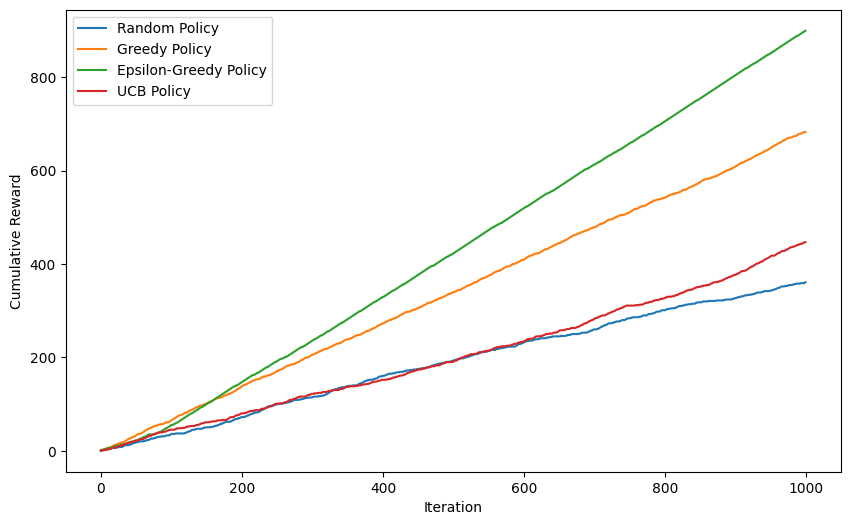

In [75]:
#Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(random_rewards), label='Random Policy')
plt.plot(np.cumsum(greedy_rewards), label='Greedy Policy')
plt.plot(np.cumsum(epsilon_greedy_rewards), label='Epsilon-Greedy Policy')
plt.plot(np.cumsum(ucb_rewards), label='UCB Policy')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

In [77]:
#Determine the best-performing policy
best_policy = np.argmax([np.sum(random_rewards), np.sum(greedy_rewards), np.sum(epsilon_greedy_rewards), np.sum(ucb_rewards)])
policies = ['Random Policy', 'Greedy Policy', 'Epsilon-Greedy Policy', 'UCB Policy']
print('Best-performing policy:', policies[best_policy])

Best-performing policy: Epsilon-Greedy Policy


To determine the best policy for cumulative reward in the Multi-Armed Bandit(MAB) problem, we need to evaluate different algorithms and their trade-offs between exploration and exploitation.

Decision Making Process
1.*Problem Formulation*: Define the MAB problem, including the number of arms, reward distributions, and time horizon.
2.*Algorithm Selection*: Choose policies to evaluate, such as:
    - Epsilon-Greedy
    - Upper Confidence Bound(UCB)
3.*Performance Metrics*: Define metrics to evaluate policy performance, including:
    - Cumulative reward
    - Regret(difference between optimal and achieved cumulative reward)
4.*Simulation*: Run simulations for each policy, using a range of parameters and initial conditions.
5.*Analysis*: Compare policy performance using the defined metrics.

Trade-offs between Exploration and Exploitation
*Exploration Strategies*
1.*Epsilon-Greedy: Explores with probability ε, otherwise exploits the current best arm.
    - Pros: Simple, effective for simple problems.
    - Cons: May not explore enough, especially with large numbers of arms.
2.*Upper Confidence Bound: Explores arms with high upper confidence bounds.
    - Pros: Balances exploration and exploitation effectively.
    - Cons: Can be computationally expensive, especially with large numbers of arms.
3.*Random Policy: Choose an arm 'i' randomly and receive reward. Repeat step till 'T' time step.
    - Pros: Simple to implement, No prior knowledge required
    - Cons: Poor performance, No learning

*Exploitation Strategies*
1.*Greedy: Always chooses the arm with the highest estimated reward.
    - Pros: Simple, effective for simple problems.
    - Cons: May not explore enough, leading to suboptimal performance.

Conclusion Compare the cumulative rewards of each policy. Determine which policy performs the best based on the cumulative reward.
UCB policy tends to perform well in scenarios where the reward distributions have high variance, while the Epsilon-Greedy policy performs well in scenarios with low variance. Random policy perform better when non-stationary environments and high-dimensional action spaces.
Best Cumulative Reward
UCB policy tends to perform well in terms of cumulative reward, as it effectively balances exploration and exploitation. However, the best policy may depend on the specific problem instance and parameters.